In [1]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# acquire data

Basic acquire data, we are not modifying anything. We just wan to see the data .

In [ ]:
# use function to acquire data
df1= wrangle.acquire_data()

In [ ]:
#check  info
df1.info()

In [ ]:
df1.shape

**Takeaways**
- we have 10 columns and 6435 columns
- no nulls
- we nned to change some columns type

# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

In [ ]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

In [ ]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those to  store type C

In [ ]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [ ]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

In [ ]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

**Takeaways**
- Instead of removing theses outliers, we decided to change them to the type based on the size.
- I gave the store_id to Natasha so she is going to change the type in the wrangle function.


# Wrangle

the wrangle_walmar function is renaming columns, adding new columns, dummi variables, and set date as index (datetime type)

In [ ]:
#using the funcion wrangle
df= new_wrangle.wrangle_walmart()

In [ ]:
#chec the data
df.info()

In [ ]:
df.head(1)

In [ ]:
#checking if the store_type has no outliers
sns.boxplot(x= df['store_type'], y= df['store_size'])

In [ ]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col],color ='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Number of Weeks ')
            plt.xticks(rotation=45)
            plt.ticklabel_format(style = 'plain')
            
            plt.show()

In [ ]:
distribution(df)

In [ ]:
df.groupby('store_type').mean()

In [ ]:
#let see distribution by store type
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [ ]:
#how many stores are Type C
len(df[df.store_type == 'C'].store_id.value_counts())

In [ ]:
# storeid for type c
df[df.store_type == 'C'].store_size.value_counts()

In [ ]:
#store if for type B
df[df.store_type == 'B'].store_size.value_counts().sort_index()

In [ ]:
#how many stores are Type B
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

In [ ]:
#store_Id for type A
df[df.store_type == 'A'].store_size.value_counts().sort_index()

In [ ]:
##how many stores are Type A
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
**Takeaways**
- after wrangle_walmar we ended with 29 columns, and 6435 observations

______________________________________

## the following steps were done to complete the wrangle function

# dummies 

we are going to create dummies for :
- Holiday_name


In [ ]:
#create dummy variables for 5 columns
def create_multiple_dummies (df, dumm_col = ['holiday_name', 'season', 'store_type', 'month', 'year']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dimmies)
    '''
    #the column year is an integer we need to conver as string
    df['year']= df['year'].astype('string')
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday', 'year'])
    return df

In [ ]:
def create_dummies (df, dumm_col = ['holiday_name']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dummies)
    '''
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday'])
    return df

In [ ]:
df['holiday_name'].value_counts()

In [ ]:
#test the function before I add it to .py file
df2 = create_dummies(df)

In [ ]:
df2.info()

In [ ]:
df2.columns

# Create new columns

#we need to create new columns  pre- christmas  and tax_season because on exploration(Alberto and Heather ) they found a peak in those dates. 

In [ ]:
#checking the previous weeks for christmas

In [ ]:
df2.head(1)

create a new column for is pre_christmas

-Christmas:

    - 31-Dec-10,  (pre_christmas = 24-Dec-10, 17-Dec 10)
    - 30-Dec-11, (pre_christmas = 23-Dec-11, 16-Dec 11)

In [ ]:
# create new colum and add zeros to everything
df2 ['pre_christmas'] = 0

In [ ]:
df2.columns

In [ ]:
#getting the list for pre_christmas
pre_c= ['2010-12-24', '2010-12-17', '2011-12-23', '2011-12-16']

In [ ]:
#add value 1 for only pre_christmas weeks
df2.loc[pre_c, 'pre_christmas'] = 1

In [ ]:
#CHECK THE VALUES
df2['pre_christmas'].value_counts()

#### ADD TAX SEASON

###  first 2 weeks of April
- 2010-04-02 & 2010-04-09
- 2011-04-01 & 2011-04-08
- 2012-04-06 & 2012-04-13

In [ ]:
#crete a new column and assign 0 as value
df2['tax_season'] = 0 

In [ ]:
#getting the list for tax
tax= ['2010-04-02 ', '2010-04-09', '2011-04-01', '2011-04-08', '2012-04-06', '2012-04-13']

In [ ]:
#add value 1 for only for the list above
df2.loc[tax, 'tax_season'] = 1

In [ ]:
#CHECK THE VALUES
df2['tax_season'].value_counts()

# Scale

In [ ]:
df2.head(1)

**note :** before scaling we need to split our data


In [ ]:
#select only the numeric columns 
num_df = df2.select_dtypes(exclude='object')

In [ ]:
num_df.shape

In [ ]:
num_df.head()

In [ ]:
#split using a function
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(num_df, 'weekly_sales')

In [ ]:
# imports to scale
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def scaled_df ( train_df , test_df, columns,  scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_test, columns , RobustScaler())
    
    '''
    #import
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

#     #add the columns that are not scaled
#     train_scaled_df = pd.concat([train_scaled_df, train_df.drop(columns = columns) ], axis= 1 )
#     test_scaled_df = pd.concat([test_scaled_df, test_df.drop(columns = columns) ], axis= 1 )
    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df,  test_scaled_df

In [ ]:
columns =  X_train.columns.to_list()

In [ ]:
#test the function
#train_Xscaled_df,  test_Xscaled_df= scaled_df( X_train , X_test, columns , MinMaxScaler())

In [ ]:
def train_test(df, target):
    '''
    This function brings in the dataframe and the target feature
    then returns X_train, y_train, X_test and y_test with their respective shapes
    '''
    train = df[:'05-2012'] # includes everything until june 2016
    test = df['06-2012':"2012"] #includes last 6 months

    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]

    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_test -> {X_test.shape}')

    return train, X_train, y_train, X_test, y_test

In [ ]:
def split_scale and scale (df, target, scaler):
    '''
    takes in a df and creates dummy variables, select only the numeric columns and  split into X_train, y_train, 
    X_test, y_test and scaled X_train, X_test.
    return   X_train_scaled, y_train_scaled, X_test, y_test
    '''



    #split
    train, X_train, y_train, X_test, y_test = train_test(num_df, target)

    #select the columns to scale
    columns =  X_train.select_dtypes(exclude='object').columns.to_list()
    #scale 
    X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, columns , scaler)

    return train, X_train_scaled, X_test_scaled, y_train, y_test
        
        
        
        
    

In [ ]:
#split
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(df, 'weekly_sales')

In [ ]:
#select the columns to scale
col =  X_train.select_dtypes(exclude='object').columns.to_list()

In [ ]:
col

In [ ]:
#scale 
X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, col , MinMaxScaler())

In [ ]:
X_train_scaled.info()

In [ ]:
train, X_train_scaled, y_train_scaled, X_test, y_test = prepare_modeling_dummies (df, 'weekly_sales', MinMaxScaler())

In [ ]:
train.shape

In [ ]:
X_train_scaled.shape

# split 

In [ ]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'weekly_sales', MinMaxScaler())

In [ ]:
X_train_scaled.info()

____________________

# Wrangle and split

let's test the functions wrangle and split and scale

In [2]:
df =new_wrangle.wrangle_walmart()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

**Note:**  we have nulls in our df because we created a new column last_year_sales that's why the fisrt year has nulls because we dond have information about the previous year

In [4]:
df.shape

(6435, 29)

In [5]:
df.holiday_name.value_counts()

no_holiday       5535
tax_season        270
pre_christmas     180
super_bowl        135
labor_day         135
christmas          90
thanksgiving       90
Name: holiday_name, dtype: int64

In [46]:
#drop nulls
df2= df.dropna()

In [47]:
df2.shape

(4095, 29)

train -> (2866, 29)
test -> (1229, 29)


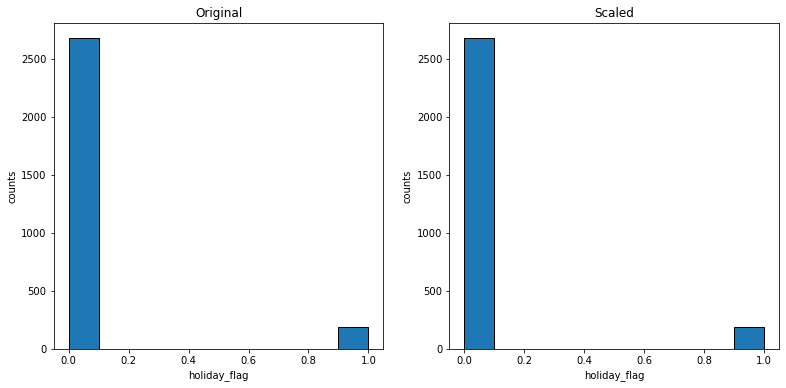

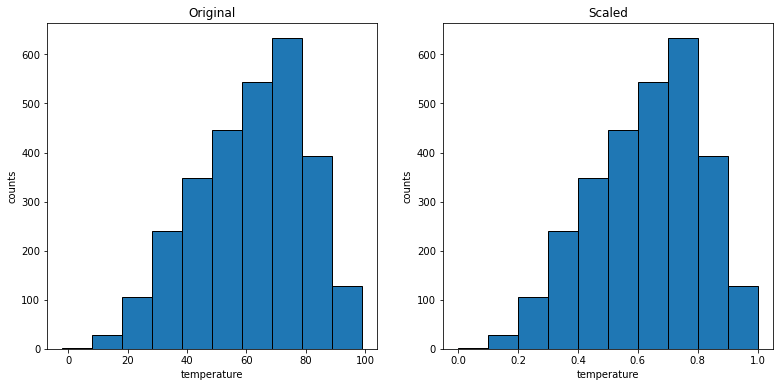

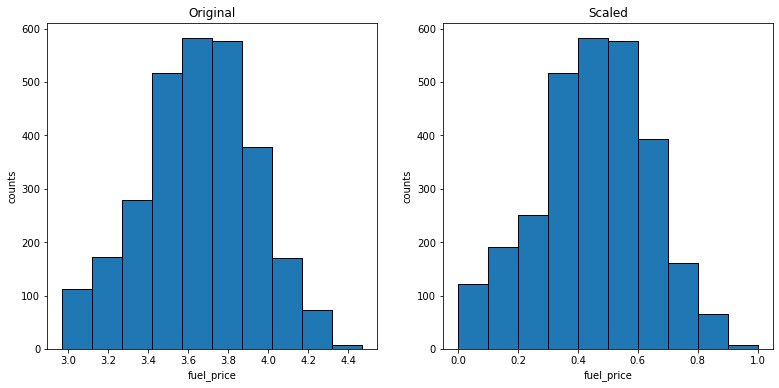

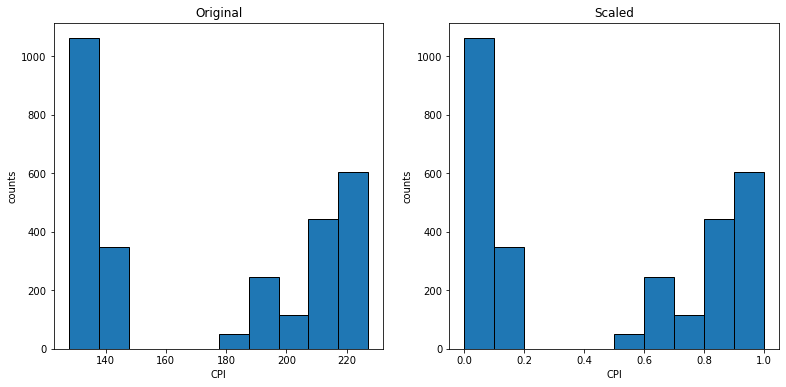

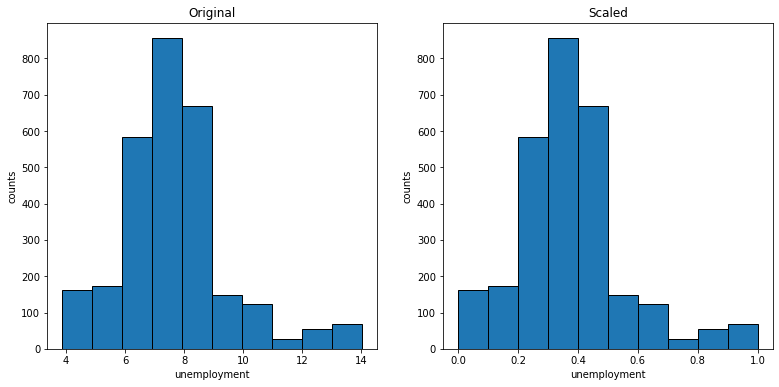

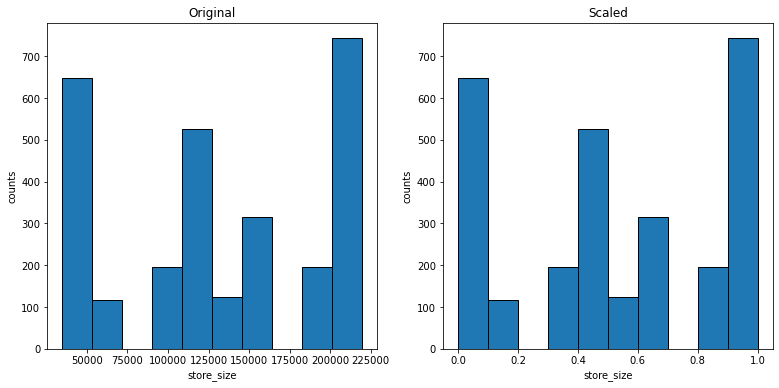

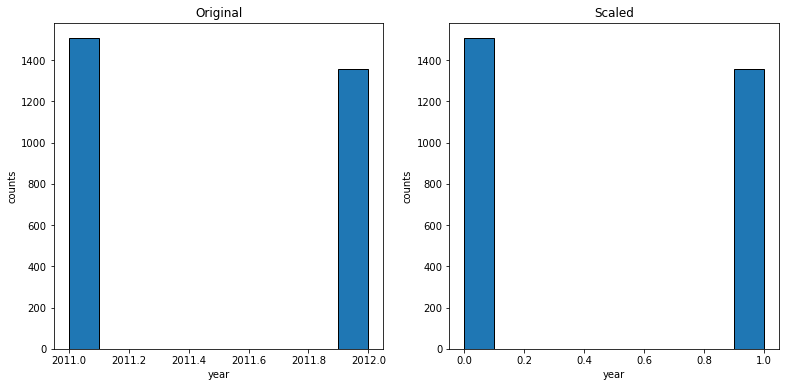

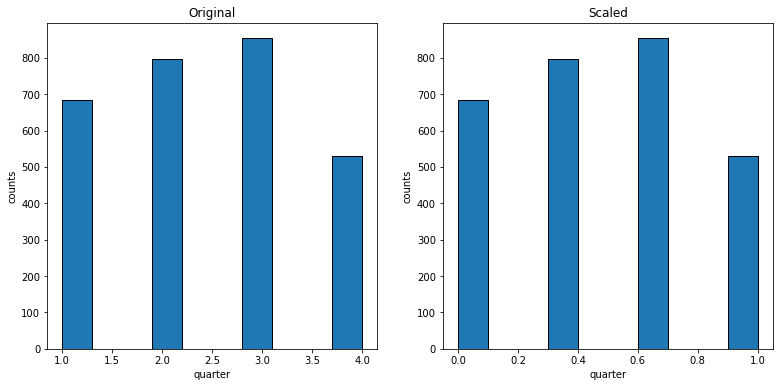

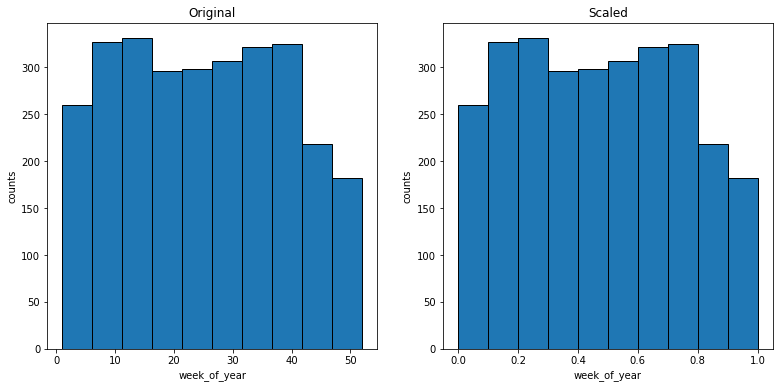

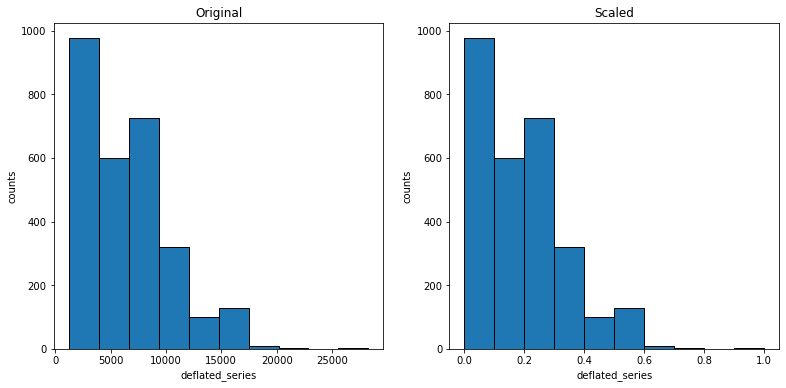

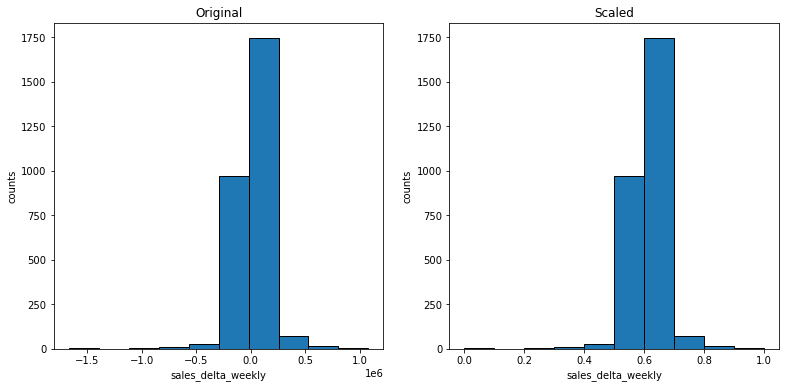

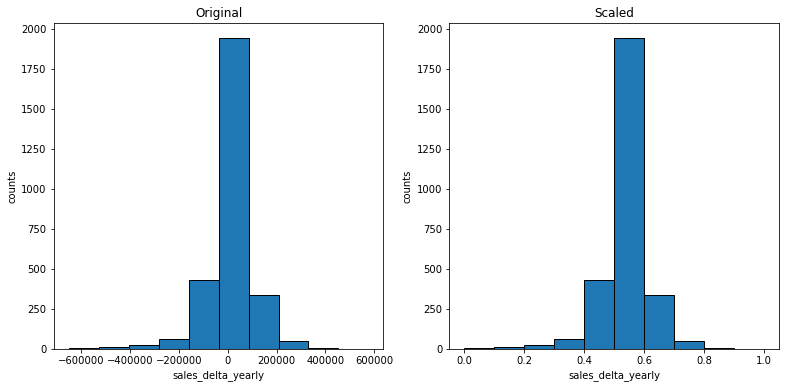

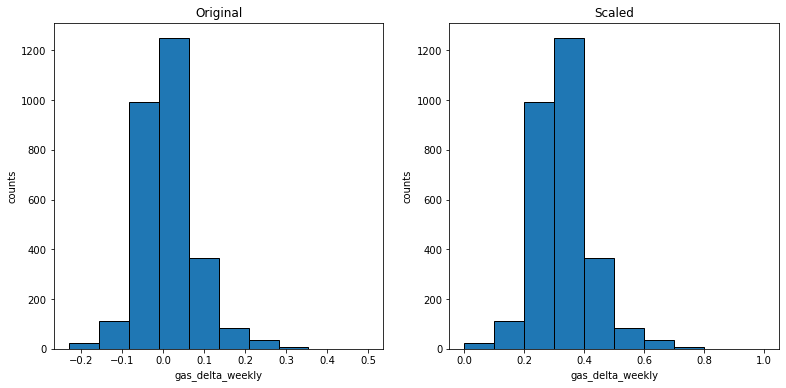

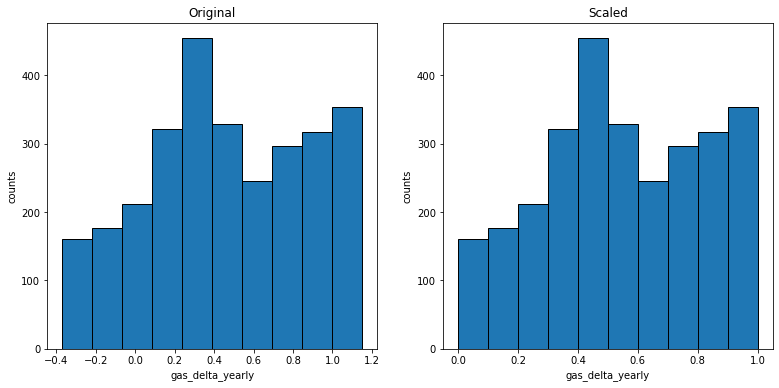

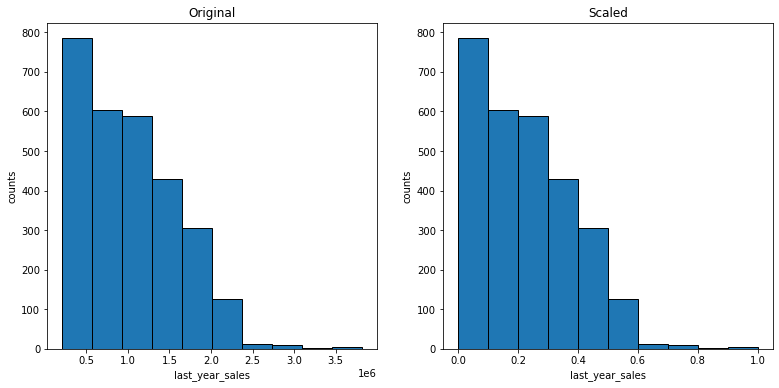

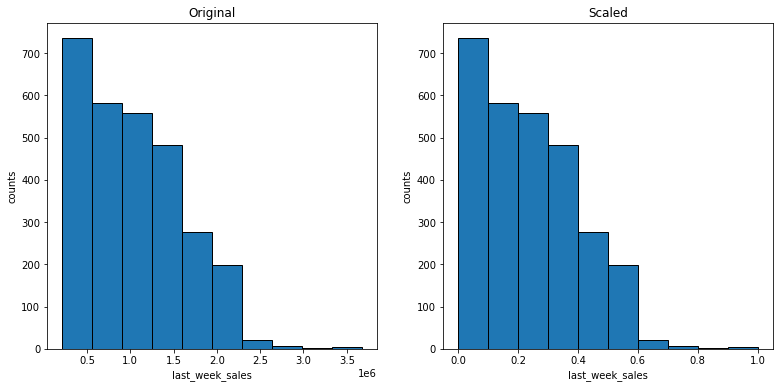

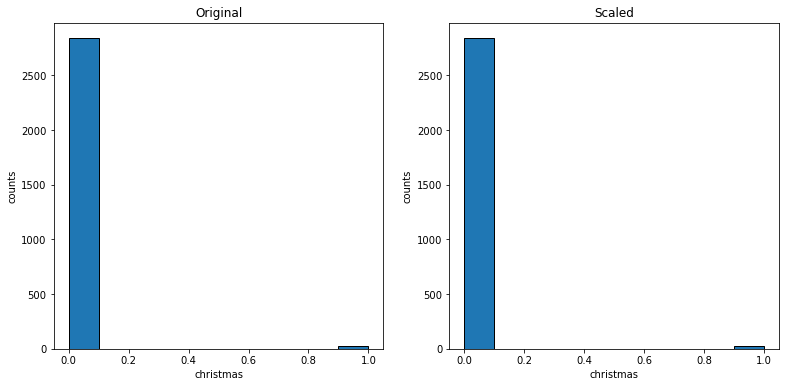

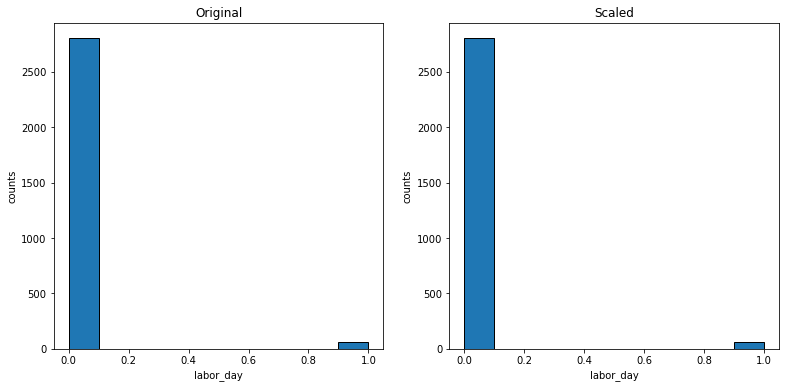

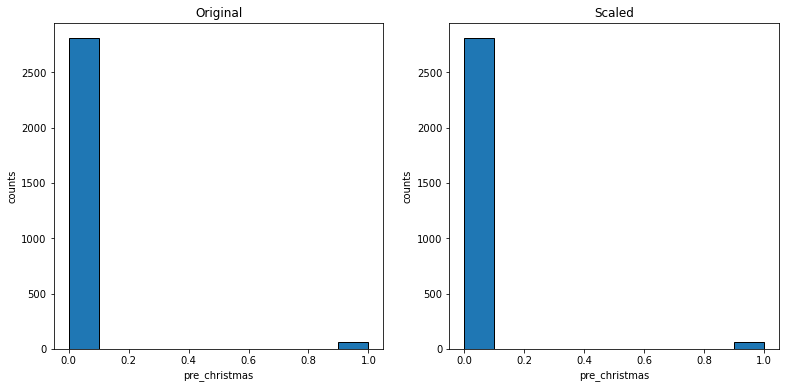

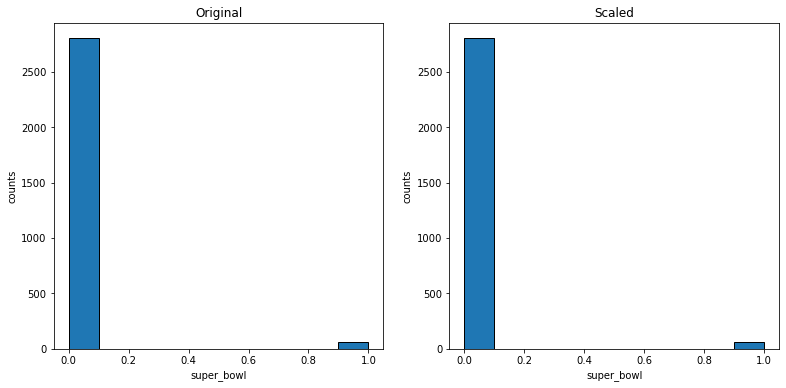

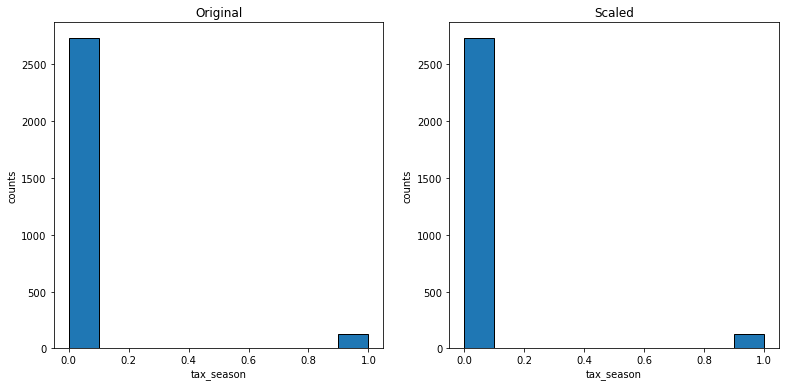

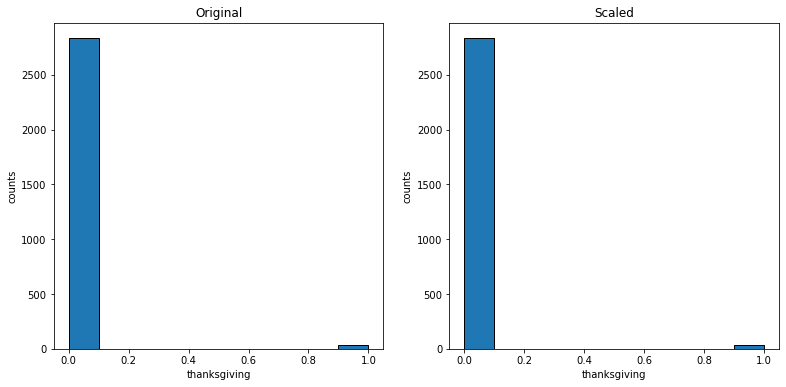

In [48]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df2, 'weekly_sales', MinMaxScaler())

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            2866 non-null   object 
 1   weekly_sales        2866 non-null   float64
 2   holiday_flag        2866 non-null   int64  
 3   temperature         2866 non-null   int64  
 4   fuel_price          2866 non-null   float64
 5   CPI                 2866 non-null   float64
 6   unemployment        2866 non-null   float64
 7   store_type          2866 non-null   object 
 8   store_size          2866 non-null   int64  
 9   month               2866 non-null   object 
 10  year                2866 non-null   int64  
 11  quarter             2866 non-null   int64  
 12  weekday             2866 non-null   object 
 13  week_of_year        2866 non-null   int64  
 14  deflated_series     2866 non-null   float64
 15  sales_delta_weekly  2866 non-null   f

In [50]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday_flag        2866 non-null   float64
 1   temperature         2866 non-null   float64
 2   fuel_price          2866 non-null   float64
 3   CPI                 2866 non-null   float64
 4   unemployment        2866 non-null   float64
 5   store_size          2866 non-null   float64
 6   year                2866 non-null   float64
 7   quarter             2866 non-null   float64
 8   week_of_year        2866 non-null   float64
 9   deflated_series     2866 non-null   float64
 10  sales_delta_weekly  2866 non-null   float64
 11  sales_delta_yearly  2866 non-null   float64
 12  gas_delta_weekly    2866 non-null   float64
 13  gas_delta_yearly    2866 non-null   float64
 14  last_year_sales     2866 non-null   float64
 15  last_week_sales     2866 non-null   f

In [51]:
y_train

Date
2011-07-08    2063401.06
2011-03-25    1140578.16
2012-02-10     662198.65
2011-02-11    1249786.40
2012-09-28    1129508.61
                 ...    
2012-10-26    1431426.34
2011-08-26    1017593.47
2012-07-20     503744.56
2012-07-20     337819.16
2012-08-10    1227469.20
Name: weekly_sales, Length: 2866, dtype: float64

# Explore 

In [10]:
df.shape

(6435, 29)

In [11]:
train.shape

(2866, 29)

In [12]:
train.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,pre_christmas,super_bowl,tax_season,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-08,14,2063401.06,0,77,3.71,186.032,8.625,A,200898,July,...,Summer,no_holiday,2236209.13,2074668.19,0,0,0,0,0,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            2866 non-null   object 
 1   weekly_sales        2866 non-null   float64
 2   holiday_flag        2866 non-null   int64  
 3   temperature         2866 non-null   int64  
 4   fuel_price          2866 non-null   float64
 5   CPI                 2866 non-null   float64
 6   unemployment        2866 non-null   float64
 7   store_type          2866 non-null   object 
 8   store_size          2866 non-null   int64  
 9   month               2866 non-null   object 
 10  year                2866 non-null   int64  
 11  quarter             2866 non-null   int64  
 12  weekday             2866 non-null   object 
 13  week_of_year        2866 non-null   int64  
 14  deflated_series     2866 non-null   float64
 15  sales_delta_weekly  2866 non-null   f

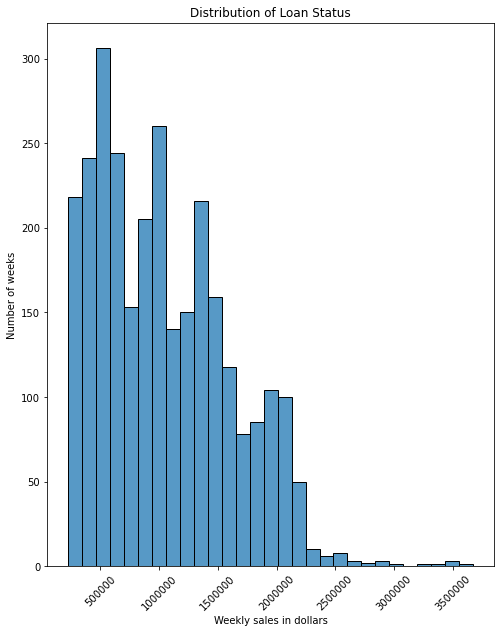

In [14]:
#explore our target
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['weekly_sales'],
                 #hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('Weekly sales in dollars')
plt.ylabel('Number of weeks')
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')

plt.show()

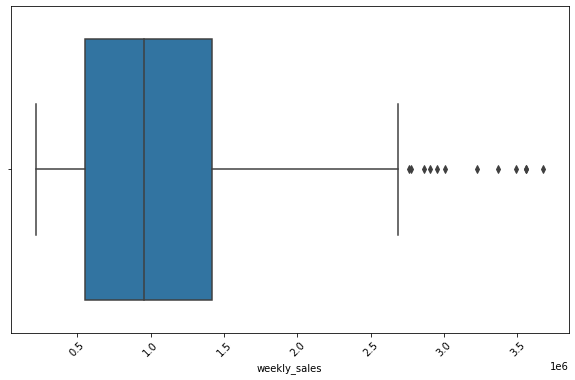

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xticks(rotation=45)
#plt.ticklabel_format(style = 'plain')
plt.show()

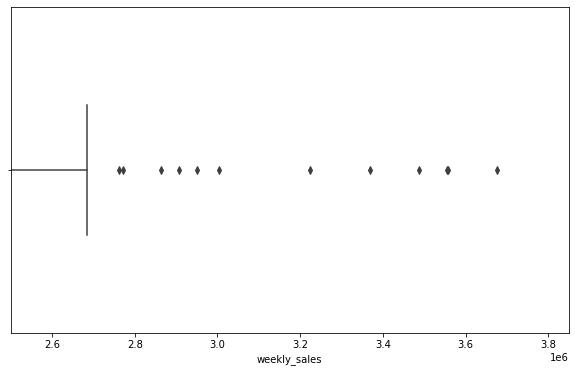

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xlim(2500000)
plt.show()

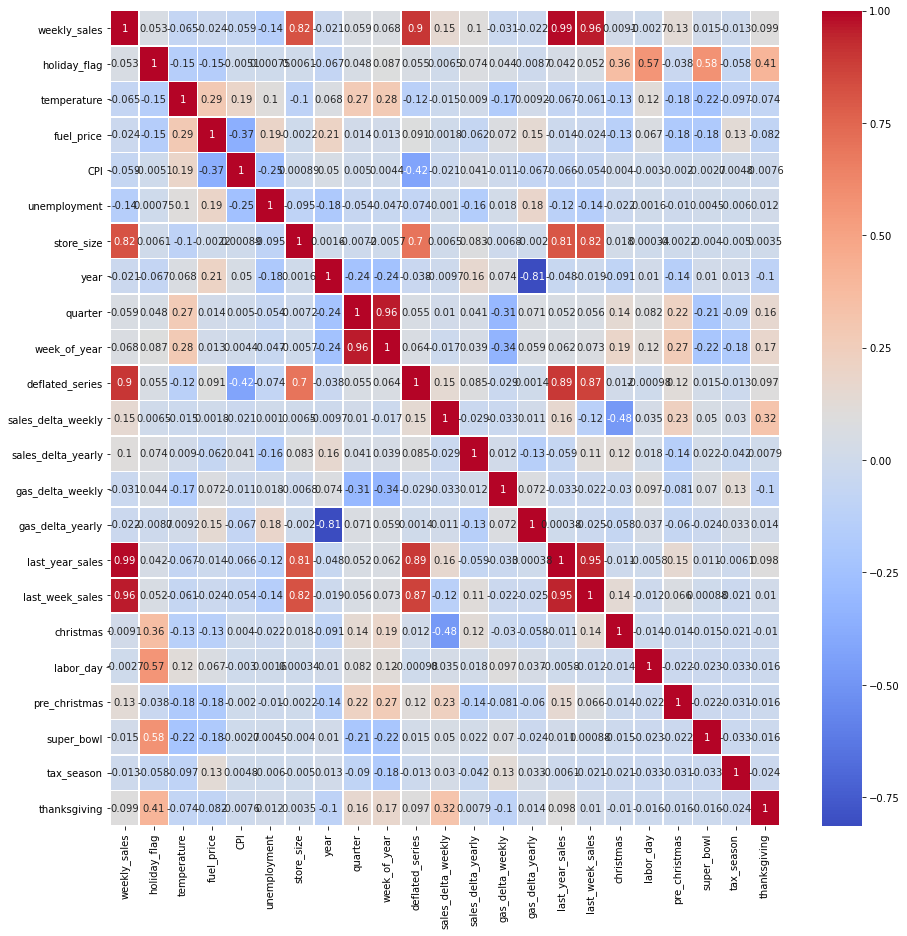

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

In [18]:
#check the relation of my target with all the featues

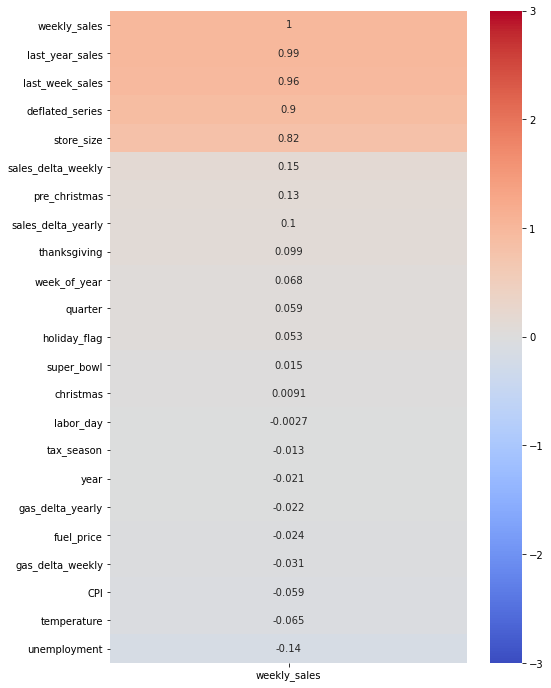

In [19]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['weekly_sales']].sort_values(by='weekly_sales', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

**takeaways**
- last week_sales, last_year_sales and store_size have stroger correlation with out target
- pre_christmas has also a positive correlation
- we can not use deflated_series because was calculated using our target
- negative correlation unemployment 

## Exploration target vs Fearture

### -  weekly_sales vs store_size

<Figure size 1152x720 with 0 Axes>

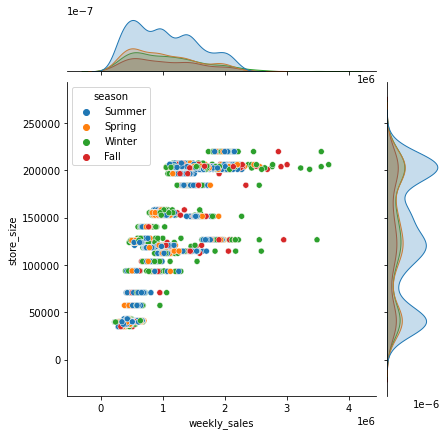

In [20]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='season')

**takeaways**
- the small the store, less weekly sales
- winter has the greater weekly sales

### -  weekly_sales vs temperature

<Figure size 864x720 with 0 Axes>

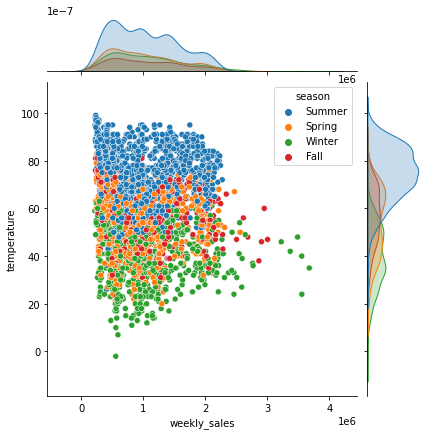

In [21]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train, hue= "season")
plt.show()

**Takeaways**
- Winter and fall have the greater weekly_sales. may it is because of christmas and blackfriday

In [22]:
# winter_df = train[train.season == "Winter"][['weekly_sales', 'temperature', 'season']]
# winter_df.head()

In [23]:
# sns.jointplot(x= 'weekly_sales', y= 'temperature', data = winter_df, hue= "season")

In [24]:
train.season.unique()

array(['Summer', 'Spring', 'Winter', 'Fall'], dtype=object)

In [25]:
color_list = ['blue','green', 'red', 'orange']

In [26]:
for season, color in zip(train.season.unique(), color_list):
    print(season, color)

Summer blue
Spring green
Winter red
Fall orange


Summer


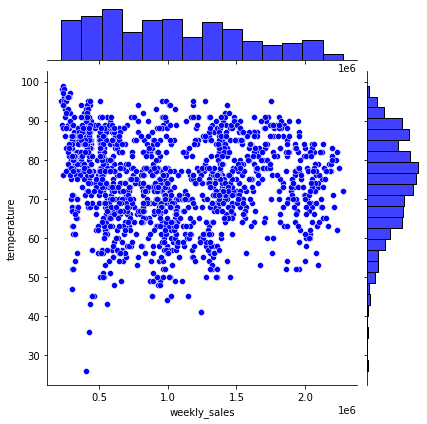

Spring


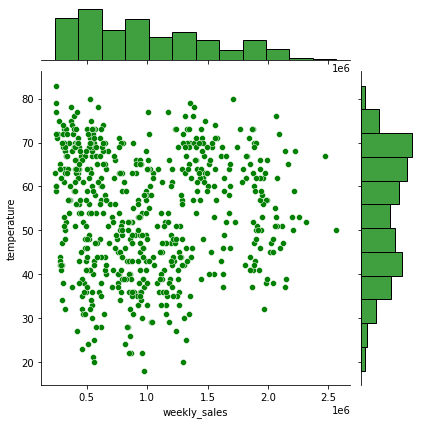

Winter


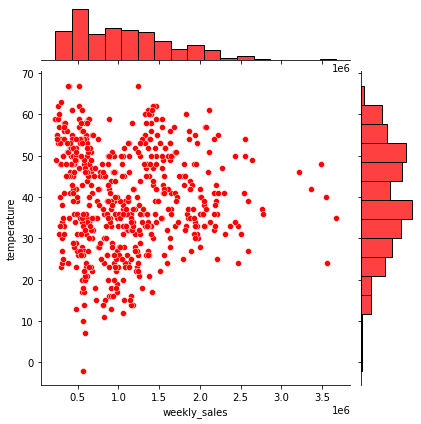

Fall


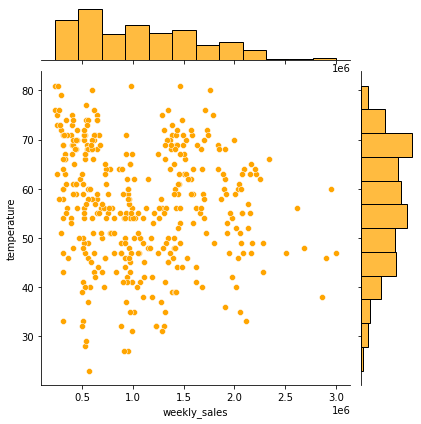

In [27]:

for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train[train.season==season], color= c)
    plt.show()

### -  weekly_sales vs holiday_name

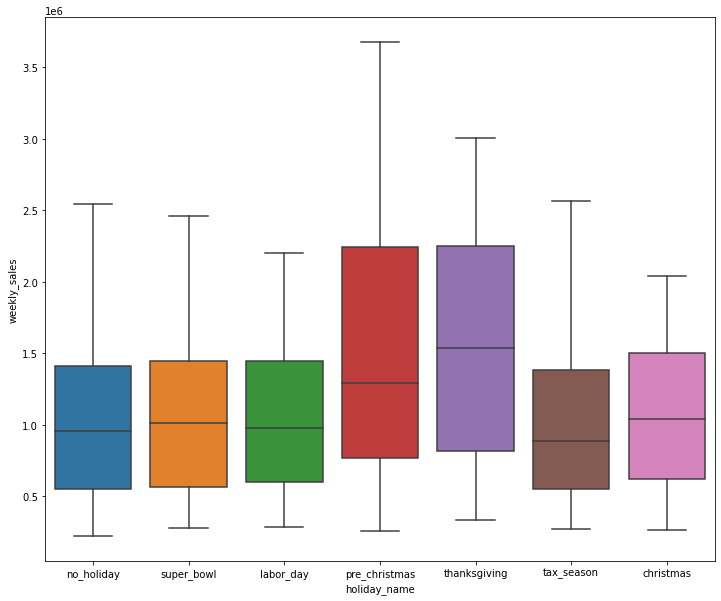

In [28]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['holiday_name'], y =train['weekly_sales'] )
plt.show()

**Takeaways**
- the 2 holidays with the greatest weekle_sales are pre_christmas and thanksgiving
-we can see christmas does not have large amount of weekly_sales it is because the people buy before christmas , it is not like blackfriday that the people actually buy in this specific week

### - weekly_sales vs season

<AxesSubplot:xlabel='season', ylabel='weekly_sales'>

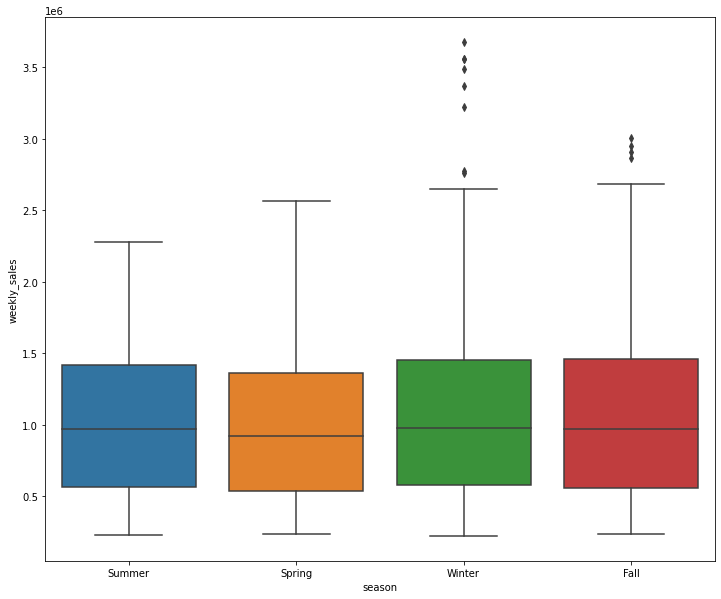

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['season'], y =train['weekly_sales'] )

**takeaways**
- we see some outliers but basically there are the weekly sales for thanksgiving and christmas (pre)
- we can say summer has the lowest range of weekly sales amout

Summer


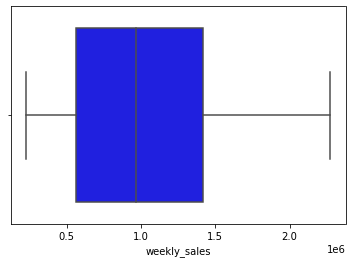

Spring


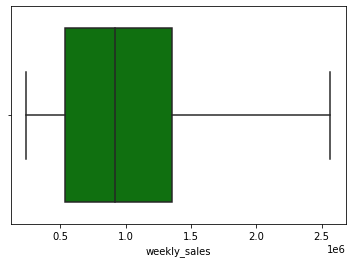

Winter


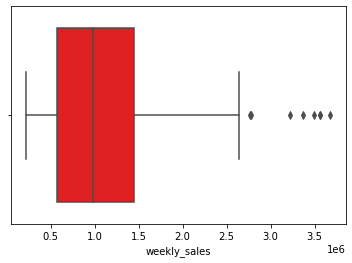

Fall


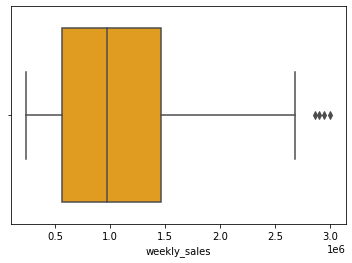

In [30]:
for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.boxplot(x= train[train.season== season]['weekly_sales'], color = c )
    plt.show()

**takeaways**
- it looks like summer has the lowest median 

# model

In [52]:
#imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import PolynomialFeatures

In [72]:

# #conver y_train y _ validate to df
y_train_df = pd.DataFrame( {'actual': y_train})
y_test_df = pd.DataFrame( {'actual': y_test})

In [54]:
def select_kbest  (X_df, y_df, n_features):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the SelectKBest class
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    Example
    select_kbest(X_train_scaled, y_train, 2)
    '''
    
    f_selector = SelectKBest(score_func=f_regression, k= n_features)
    f_selector.fit(X_df, y_df)
    mask = f_selector.get_support()
    X_df.columns[mask]
    top = list(X_df.columns[mask])
    print(f'The top {n_features} selected feautures based on the SelectKBest class are: {top}' )
    return top

In [55]:
def select_rfe (X_df, y_df, n_features, method):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the Recursive Feature Elimination (RFE)
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    method : LinearRegression, LassoLars, TweedieRegressor
    Example
    select_rfe(X_train_scaled, y_train, 2, LinearRegression())
    '''
    lm = method
    rfe = RFE(estimator=lm, n_features_to_select= n_features)
    rfe.fit(X_df, y_df)
    top_rfe = list(X_df.columns[rfe.support_])
    print(f'The top {n_features} selected feautures based on the the RFE class class are: {top_rfe}' )
    print(pd.Series(dict(zip(X_df.columns, rfe.ranking_))).sort_values())
    return top_rfe

In [56]:
def create_model (X_df_scaled, y_df, actual, method, name):
    '''
    takes in features scaled df, target df, name of actual target, 
    type of method and the name of the selected method and 
    returns a dictionary that contains calculated regression errors.
    
    X_df_scaled : df that contains scaled featues
    y_df: target df
    actual: name of the column where is actual value of the target
    mehod: type of method to create the model object
    name: enter the new name for your model
    
    Example:
    create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
    '''
    # fit the thing
    method.fit(X_df_scaled, y_df[actual])

    # predict train
    y_df[name] = method.predict(X_df_scaled)

    #calculate regression errors using a created function
    train_eval = eval.regression_errors(y_df, actual, name)

    return train_eval

In [57]:
def report(metric_df):
    
    from IPython.display import display, HTML
    rmse_base = metric_df.iloc[0,2]
    print(f'These are the models that perform better than our baseline rmse: {rmse_base}')
    dfs =metric_df[['model', 'rmse_validate']][metric_df['rmse_validate'] < rmse_base]
    display(HTML(dfs.to_html()))
    
    
    min_val = metric_df['rmse_validate'].idxmin()
    metric_df.iloc[min_val][0]
    rsme_bet = round(metric_df['rmse_validate'].iloc[min_val], 2)
    print('-----------------------------------------------------------------------------------------------')
    print(f'   ********** The model with the less  rmse_validate  is {metric_df.iloc[min_val][0] }  rmse:{rsme_bet} **********             ')
    print('-----------------------------------------------------------------------------------------------')
    print(' ')
    min_val = metric_df['r^2_validate'].idxmax()
    metric_df.iloc[min_val][0]
    print(f'The model with r^2 validate closer to 1 is ', metric_df.iloc[min_val][0])
    
    display(HTML(metric_df.to_html()))
    return

In [58]:
def baseline_errors(df, y, option ):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values
    Example:
    baseline_mean_errors(y_train, 'actual')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    if option == 'mean':
        df['yhat_baseline_mean'] = df[y].mean()
        col = 'yhat_baseline_mean'
    elif option == 'median':
        df['yhat_baseline_median'] = df[y].median()
        col = 'yhat_baseline_median'
    else:
        return print("please select the correct option: 'mean' or 'median' ")
        
    

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df[col])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df[col] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df[col])
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

**- Baseline**

In [59]:
y_train.mean()

1044296.2597557559

In [60]:
y_train.median()

957922.2949999999

In [73]:
#create baseline using mean (I'm using my function to calculate rmse)
tra = baseline_errors(y_train_df, 'actual', 'mean')
tra['rmse']

563052.7256939057

In [74]:
#create a df to store metrics
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : round(tra['rmse'], 2),
    'rmse_validate': 0,
    'rmse_difference' : 0,
    'r^2_validate' : 0}])

In [75]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,563052.73,0,0,0


### - select k best

In [68]:
#dropping the columns that are related with our target
X_train_scaled = X_train_scaled.drop(columns = ['deflated_series','sales_delta_weekly','sales_delta_yearly'])

In [79]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 6)

The top 6 selected feautures based on the SelectKBest class are: ['unemployment', 'store_size', 'last_year_sales', 'last_week_sales', 'pre_christmas', 'thanksgiving']


In [ ]:
### - RFE